In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ori=pd.read_csv('website_data_20190225.csv')
ori.drop(['STATE','DISTRICT','WLCODE','SITE_TYPE','TEH_NAME'],axis=1,inplace=True)
ori.replace(to_replace="'0",value=0,inplace=True)
ori.head()

,BLOCK_NAME,LAT,LON,SITE_NAME,YEAR_OBS,MONSOON,POMRB,POMKH,PREMON
0,Masuda,26.100000,74.416667,Pakhriawas,2016,13.23,0,12.52,14.1
1,Peesangan,26.246667,74.578333,Saradhana,2016,19.31,19.03,18.78,19.35
2,Arain,25.911111,75.041667,Sanpla,2016,5.45,0,4.47,5.75
3,Srinagar,26.266667,74.833333,Ramsar,2016,6.7,0,5.72,7.15
4,Jawaja,25.883333,74.150000,Taragarh,2016,4.12,0,3.21,4.17


In [3]:
dataset=pd.DataFrame().reindex_like(ori)
dataset1=pd.DataFrame().reindex_like(ori)
dataset.dropna(inplace=True)
dataset1.dropna(inplace=True)

# j=0
# for i in range(0,ori.shape[0]):
#     if ori['STATE'][i]=='RJ':
#         dataset.loc[j] = ori.iloc[i]
#         j+=1
# dataset.drop(['STATE'],axis=1,inplace=True)

# j=0
# for i in range(0,ori.shape[0]):
#     if ori['DISTRICT'][i]=='Ajmer':
#         dataset.loc[j] = ori.iloc[i]
#         j+=1
# dataset.drop(['DISTRICT'],axis=1,inplace=True)

j=0
for i in range(0,ori.shape[0]):
    if ori['BLOCK_NAME'][i]=='Arain':
        dataset1.loc[j] = ori.iloc[i]
        j+=1
dataset1.drop(['BLOCK_NAME'],axis=1,inplace=True)
dataset.drop(['BLOCK_NAME'],axis=1,inplace=True)

j=0
for i in range(0,dataset1.shape[0]):
    if dataset1['SITE_NAME'][i]=='Sanpla':
        dataset.loc[j] = dataset1.iloc[i]
        j+=1
lat=dataset["LAT"][0]
lon=dataset["LON"][0]
dataset.drop(['SITE_NAME','LAT','LON'],axis=1,inplace=True)
 
dataset

,YEAR_OBS,MONSOON,POMRB,POMKH,PREMON
0,2016.0,5.45,0,4.47,5.75
1,2015.0,3.3,4,4.51,4.62
2,2014.0,2.7,4.58,3.34,9.3
3,2013.0,2.83,2.96,2.91,5.85
4,2012.0,0,2.8,5.25,0
5,2011.0,2.74,8.97,2.97,6.62
6,2010.0,11.15,10.3,9.15,12.55
7,2009.0,8.71,0,9.23,13.15
8,2008.0,8.47,8.25,8.78,7.32
9,2007.0,8.5,8.14,7.58,7.39


In [4]:
for i in range(0,dataset.shape[0]):
    dataset['MONSOON'][i]=float(dataset['MONSOON'][i])
    dataset['POMRB'][i]=float(dataset['POMRB'][i])
    dataset['POMKH'][i]=float(dataset['POMKH'][i])
    dataset['PREMON'][i]=float(dataset['PREMON'][i])
    dataset['YEAR_OBS'][i]=int(dataset['YEAR_OBS'][i])

In [5]:
first=list(dataset['MONSOON'])
second=list(dataset['POMRB'])
third=list(dataset['POMKH'])
fourth=list(dataset['PREMON'])
dataset['MONSOON']=pd.core.frame.DataFrame(x+y+z+w for x, y,z,w in zip(first, second, third, fourth))
dataset.drop(['POMRB','POMKH','PREMON'],axis=1,inplace=True)
dataset = dataset.iloc[::-1]
dataset

,YEAR_OBS,MONSOON
21,1994.0,30.31
20,1995.0,29.94
19,1996.0,22.09
18,1997.0,29.26
17,1998.0,29.38
16,1999.0,34.02
15,2000.0,47.96
14,2001.0,34.18
13,2002.0,29.25
12,2003.0,21.40


In [6]:
dataset['YEAR_OBS']=(dataset['YEAR_OBS']).apply(np.int64)

In [7]:
dataset['YEAR_OBS']=pd.to_datetime(dataset['YEAR_OBS'],yearfirst=True,format='%Y',infer_datetime_format=True)
indexedDataset=dataset.set_index(['YEAR_OBS'])

In [8]:
from datetime import datetime
indexedDataset.head(50)

,MONSOON
YEAR_OBS,
1994-01-01,30.31
1995-01-01,29.94
1996-01-01,22.09
1997-01-01,29.26
1998-01-01,29.38
1999-01-01,34.02
2000-01-01,47.96
2001-01-01,34.18
2002-01-01,29.25


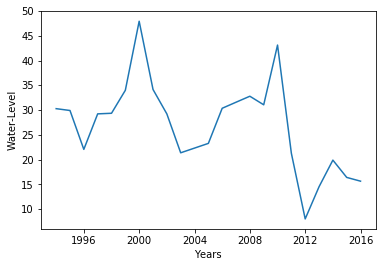

In [9]:
plt.xlabel('Years')
plt.ylabel('Water-Level')
plt.plot(indexedDataset)

- A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., "stationarized") through the use of mathematical transformations. A stationarized series is relatively easy to predict: you simply predict that its statistical properties will be the same in the future as they have been in the past!

- We can check stationarity using the following:

- - Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. This is more of a visual technique.
- - Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TimeSeries is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [10]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    
    #Determing rolling statistics
    moving_average=timeseries.rolling(window=12).mean()
    standard_deviation=timeseries.rolling(window=12).std()
    
    #Plot rolling statistics:
    plt.plot(timeseries,color='blue',label="Original")
    plt.plot(moving_average,color='red',label='Mean')
    plt.plot(standard_deviation,color='black',label='Standard Deviation')
    plt.legend(loc='best')  #best for axes
    plt.title('Rolling Mean & Deviation')
#     plt.show()
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results Of Dickey-Fuller Test')
    tstest=adfuller(timeseries['MONSOON'],autolag='AIC')
    tsoutput=pd.Series(tstest[0:4],index=['Test Statistcs','P-value','#Lags used',"#Obs. used"])
    #Test Statistics should be less than the Critical Value for Stationarity
    #lesser the p-value, greater the stationarity
    # print(list(dftest))
    for key,value in tstest[4].items():
        tsoutput['Critical Value (%s)'%key]=value
    print((tsoutput))

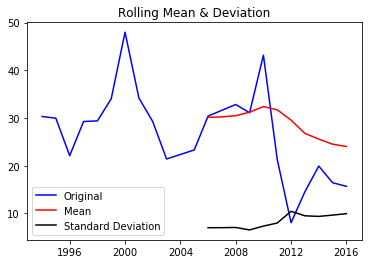

Results Of Dickey-Fuller Test
Test Statistcs           1.749620
P-value                  0.998244
#Lags used               9.000000
#Obs. used              12.000000
Critical Value (1%)     -4.137829
Critical Value (5%)     -3.154972
Critical Value (10%)    -2.714477
dtype: float64


In [11]:
test_stationary(indexedDataset)

- There are 2 major reasons behind non-stationaruty of a TS:
- - Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
- - Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

## Indexed Dataset Logscale

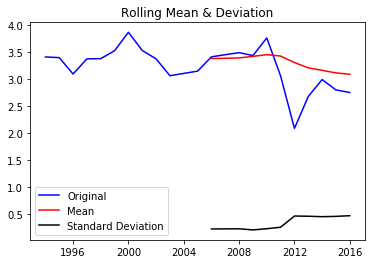

Results Of Dickey-Fuller Test
Test Statistcs           1.514525
P-value                  0.997577
#Lags used               9.000000
#Obs. used              12.000000
Critical Value (1%)     -4.137829
Critical Value (5%)     -3.154972
Critical Value (10%)    -2.714477
dtype: float64


In [13]:
indexedDataset_logscale=np.log(indexedDataset)
test_stationary(indexedDataset_logscale)